<h1> $Mid \;Semester$

dataset taken from https://archive.ics.uci.edu/dataset/320/student+performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import IPython
import sklearn
import seaborn as sns

In [2]:
D=pd.read_csv("student-mat.csv", sep=';')

In [3]:
D

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df=pd.DataFrame(D)

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df.count(axis=1)

0      33
1      33
2      33
3      33
4      33
       ..
390    33
391    33
392    33
393    33
394    33
Length: 395, dtype: int64

<h1> a) No. of Features = 34

In [9]:
df.head(0)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


<h1> b) The above are all the names of the features of the dataset and the below are the types of the features of the datatpyes

In [11]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

KEY 

1) Famsize - GT3 (Greater than 3), LT3 (Less than 3)
2) Address - U urban , R rural
3) PStatus - T - Together, A - Apart
4) Medu - Mother's Education - 0 None, 1 Primary, 2- 5 to 9th grade, 3 - secondary, 4- higher education
5) Fedu - Father's education (as mother's education)
6) time related fields - (1 : <15 min) (2: 15 to 30 min) (3: 30 min to 1hr) (4 > 1hr)
7) faliures - no of faliures if oast clasees)
8) famrel - Quality of family relations ( 1 - vbad to 5 excellent)
9) freetime - Free time after school (1 very low to 5 vbad)
10) goout - go out with friends
11) Dalc - Workday Alcohol consumption
12) Walk - Weekend Alcohol consumption
13) Absence - Number of school absences
14) Grade 1, Grade 2, Grade 3


<h1> c. We ask the following questions and answer these in the datasets

<h2>Q1. $\mathcal{Try \;to \;Determine\; whether \; there \; is\; any\; relation\; between\; the\; number \;of \;absent\; days \; and \; the \; grades \; the \; student \; obtains}$

In [6]:
print (df[['absences','G1','G2','G3']])

     absences  G1  G2  G3
0           6   5   6   6
1           4   5   5   6
2          10   7   8  10
3           2  15  14  15
4           4   6  10  10
..        ...  ..  ..  ..
390        11   9   9   9
391         3  14  16  16
392         3  10   8   7
393         0  11  12  10
394         5   8   9   9

[395 rows x 4 columns]


In [7]:
A = df [['absences']].sort_values('absences')

In [8]:
G11 = df[['G1','absences']].sort_values('absences')

Text(0, 0.5, 'Grades')

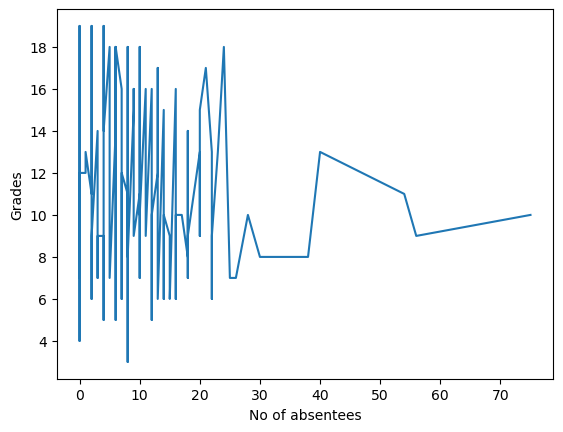

In [9]:
plt.plot(G11[['absences']], G11[['G1']] )
plt.xlabel('No of absentees')
plt.ylabel('Grades')

$\textbf{As a result, we observe that the no of absentees have no relation with the G1 grades a student obtain.}$

In [10]:
G21 = df[['G2','absences']].sort_values('absences')

Text(0, 0.5, 'Grades')

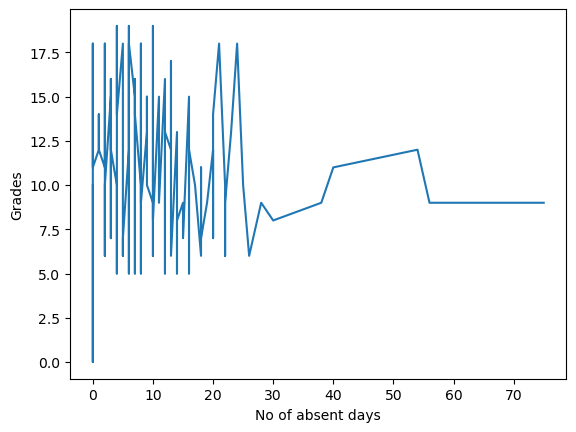

In [11]:
plt.plot(G21[['absences']], G21[['G2']] )
plt.xlabel('No of absent days')
plt.ylabel('Grades')

$\textbf{As a result, we observe that the no of absentees have no relation with the G2 grades a student obtain.}$

In [12]:
G31 = df[['G3','absences']].sort_values('absences')

Text(0, 0.5, 'Grades')

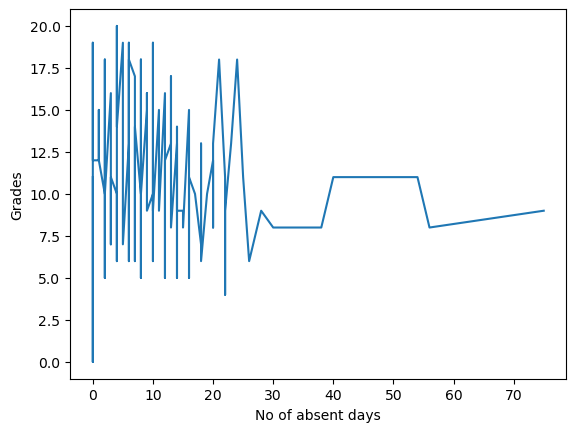

In [13]:
plt.plot(G31[['absences']], G31[['G3']] )
plt.xlabel('No of absent days')
plt.ylabel('Grades')

$\textbf{As a result, we observe that the no of absentees have no relation with the G1 grades a student obtain.}$

Text(0, 0.5, 'Grades')

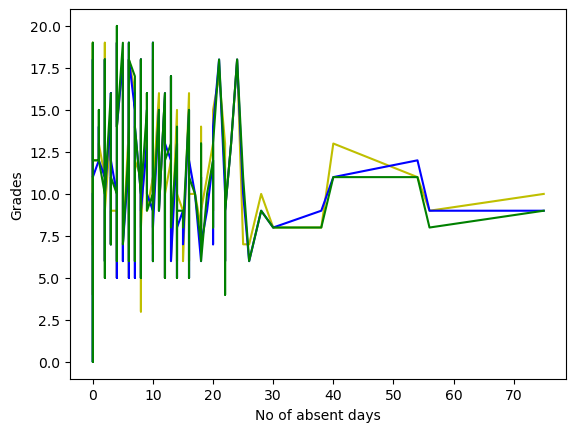

In [14]:
plt.plot(G11[['absences']], G11[['G1']] , 'y')
plt.plot(G21[['absences']], G21[['G2']] , 'b')
plt.plot(G31[['absences']], G31[['G3']] , 'g')
plt.xlabel('No of absent days')
plt.ylabel('Grades')

$\textbf{All the grade datasets give the same result, the grades seems to be no related to the no of absent days of a student.}$

<h3> $\mathbb{We \;observe\; that\; there\; is\; little\; to\; no\; relation\; between\; between \;the\; number\; of\; absences\; of\; student\; and\; the\; grades.}$

<h2>Q2 $\mathcal{Analyze \; the \; relation \;the \; grades \;of \;a \; student  \; and \; their \; father's \; and \; mother's \; educational \; qualifications}$

In [15]:
G11 = df[['G1','Medu']].sort_values('Medu')
G22 = df[['G1','Fedu']].sort_values('Fedu')

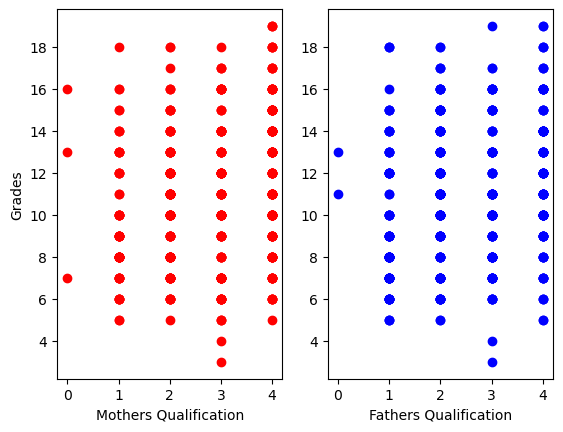

In [16]:
plt.subplot(1,2,1)
plt.scatter(G11[['Medu']], G11[['G1']], color='red')
plt.xlabel('Mothers Qualification')
plt.ylabel('Grades')
plt.subplot(1,2,2)
plt.scatter(G22[['Fedu']], G22[['G1']], color='blue')
plt.xlabel('Fathers Qualification')
plt.show()

The G1 grade does not seem to be very different for very differing father's and mother's qualifications.

In [17]:
G31 = df[['G2','Medu']].sort_values('Medu')
G32 = df[['G2','Fedu']].sort_values('Fedu')

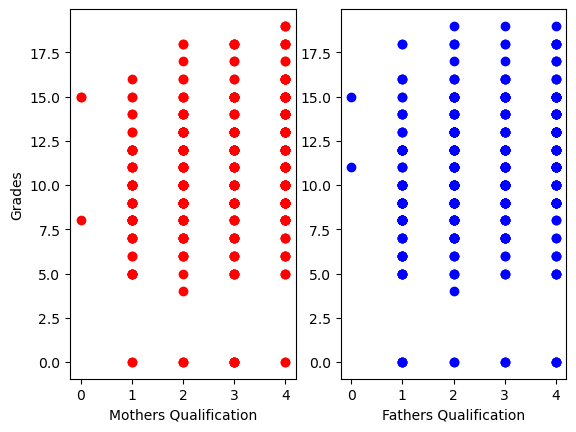

In [18]:
plt.subplot(1,2,1)
plt.scatter(G31[['Medu']], G31[['G2']] , color='red')
plt.xlabel('Mothers Qualification')
plt.ylabel('Grades')
plt.subplot(1,2,2)
plt.scatter(G32[['Fedu']], G32[['G2']] , color = 'blue')
plt.xlabel('Fathers Qualification')
plt.show()

The G2 grade does not seem to be very different for very differing father's and mother's qualifications.

In [19]:
G33 = df[['G3','Medu']].sort_values('Medu')
G34 = df[['G3','Fedu']].sort_values('Fedu')

Text(0.5, 0, 'Fathers Qualification')

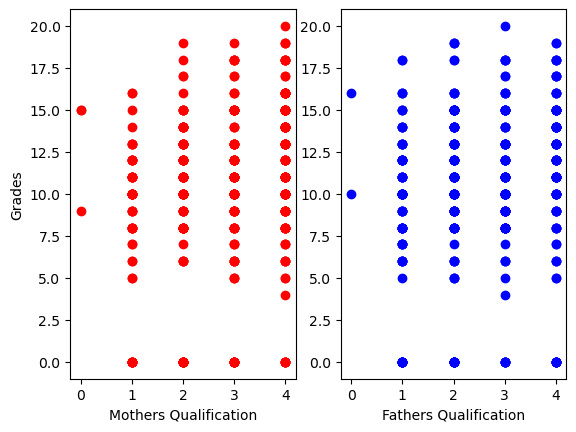

In [20]:
plt.subplot(1,2,1)
plt.scatter(G33[['Medu']], G33[['G3']],  color='red' )
plt.xlabel('Mothers Qualification')
plt.ylabel('Grades')
plt.subplot(1,2,2)
plt.scatter(G34[['Fedu']], G34[['G3']], color = 'blue' )
plt.xlabel('Fathers Qualification')

The G3 grade does not seem to be very different for very differing father's and mother's qualifications.

Let us try to find the mean of grades of students with high mother's and father's qualification.

In [21]:
df2 = df[(df.Fedu > 3)]
a1=df2["G1"].mean()
print (a1)
df2 = df[(df.Medu > 3)]
b1=df2["G1"].mean()
print (b1)

11.927083333333334
11.908396946564885


In [22]:
df2 = df[(df.Fedu > 3)]
a2=df2["G2"].mean()
print (a2)
df2 = df[(df.Medu > 3)]
b2=df2["G2"].mean()
print (b2)

11.5625
11.84732824427481


In [23]:
df2 = df[(df.Fedu > 3)]
a3=df2["G3"].mean()
print (a3)
df2 = df[(df.Medu > 3)]
b3=df2["G3"].mean()
print (b3)

11.364583333333334
11.763358778625955


In [24]:
print ((a1+a2+a3 - b1 -b2-b3)/3)

-0.22163910093299263


In [25]:
A = (a1+a2+a3)/3
B = (b1+b2+b3)/3
print(A,B)

11.618055555555557 11.839694656488549


Among the students whose family is highly educated there seems to be difference of $0.22$ due to qualification difference in qualification of Fathers and Mothers.

In [26]:
df2 = df[(df.Fedu < 3)]
c1=df2["G1"].mean()
print (c1)
df2 = df[(df.Medu < 3)]
d1 = (df2["G1"].mean())
print (d1)

10.50251256281407
10.296969696969697


In [27]:
df2 = df[(df.Fedu < 3)]
c2=df2["G2"].mean()
print (c2)
df2 = df[(df.Medu < 3)]
d2 = (df2["G2"].mean())
print (d2)

10.28643216080402
9.975757575757576


In [28]:
df2 = df[(df.Fedu < 3)]
c3=df2["G3"].mean()
print (c3)
df2 = df[(df.Medu < 3)]
d3 = (df2["G3"].mean())
print (d3)

9.834170854271356
9.412121212121212


In [29]:
print ((c1+c2+c3-d1-d2-d3)/3)

0.31275569768032047


In [30]:
C = (c1+c2+c3)/3
E = (d1+d2+d3)/3
print(C,E)

10.207705192629815 9.894949494949495


In [31]:
print (A-B, C-E)

-0.22163910093299144 0.31275569768031986


In [32]:
print ((A+B)/2 , (C+E)/2)

11.728875106022052 10.051327343789655


Among the students whose family is highly educated there seems to be difference of $0.11$ due to qualification difference in qualification of Fathers and Mothers.

The following observations were made
1) Students whose family is highly educated performed on average $1.67$ points better than students whose parents are less qualified.
2) For students with highly qualified families, students with highly qualified mothers performed slightly better $0.22$ points than students with highly qualified fathers.
3) For students with less academically qualified families, students with less academically qualified fathers performed better by $0.35$ grade points than students with less academically qualified mothers.

$\textbf{Students with highly qualified families may tend to perform better than students with less academically qualified parents by a decent margin.}$

$\textbf{For highly qualified families, mothers high qualification helps the student a little bit more than the fathers whereas in lower academically qualified parents higher qualified fathers help their kid more.}$

<h2> Q3 $\mathcal{Analyze \; the \; grades \; of \; a \; student \; against \; the \; drinking \; and \; going \; out \;activities \;of  \; the \;student }$

In [33]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


We first assign a value to the sum of a person going out, Drinking alcohol during the week or the weekend.

In [34]:
K=df[['goout','Dalc','Walc','G1','G2','G3']]

In [35]:
K['extr']=K['goout']+K['Walc']+K['Dalc']

C:\Users\manan\AppData\Local\Temp\ipykernel_28048\3822743978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K['extr']=K['goout']+K['Walc']+K['Dalc']


In [36]:
K=K[['G1','G2','G3','extr']]

In [37]:
K

,G1,G2,G3,extr
0,5,6,6,6
1,5,5,6,5
2,7,8,10,7
3,15,14,15,4
4,6,10,10,5
...,...,...,...,...
390,9,9,9,13
391,14,16,16,12
392,10,8,7,9
393,11,12,10,8


Text(0.5, 0, 'Extra Curriculur Activities')

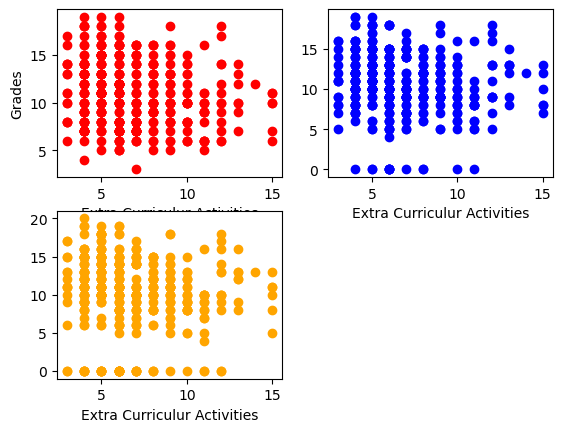

In [76]:
H11 = K[['G1','G2','G3','extr']].sort_values('extr')
plt.subplot(2,2,1)
plt.scatter(H11[['extr']], H11[['G1']], color='red')
plt.xlabel('Extra Curriculur Activities')
plt.ylabel('Grades')
plt.subplot(2,2,2)
plt.scatter(H11[['extr']], H11[['G2']], color='blue')
plt.xlabel('Extra Curriculur Activities')
plt.subplot(2,2,3)
plt.scatter(H11[['extr']], H11[['G3']], color='orange')
plt.xlabel('Extra Curriculur Activities')

In [62]:
L1=K.sort_values(by='G1',ascending = False)
Z1=L1.head(50)
a1=Z1['extr'].mean()/3
g1=Z1['G1'].mean()
print (a1,g1)

2.026666666666667 16.48


In [63]:
L2 = K.sort_values(by='G2',ascending = False)
Z2=L2.head(50)
a2=Z2['extr'].mean()/3
g2=Z2['G2'].mean()
print (a2,g2)

2.0933333333333333 16.42


In [64]:
L3 = K.sort_values(by='G3',ascending = False)
Z3=L3.head(50)
a3=Z3['extr'].mean()/3
g3=Z3['G3'].mean()
print (a3,g3)

1.9866666666666666 16.78


In [66]:
print ((a1+a2+a3)/3)
print ((g1+g2+g3)/3)

2.0355555555555553
16.560000000000002


We observe the following
1) The bright top 50 students in every grade semester, has approximately an average of 2 point in going out, drinking alcohol.
2) The average grade of the students does not decrease during the course, and it is 16.56 points.
3) The hours of student going around and frolicking increases a little in the second semester.

In [67]:
M1=K.sort_values(by='G1',ascending = True)
X1=M1.head(50)
b1=X1['extr'].mean()/3
h1=X1['G1'].mean()
print (b1,h1)

2.433333333333333 6.1


In [68]:
M2=K.sort_values(by='G2',ascending = True)
X2=M2.head(50)
b2=X2['extr'].mean()/3
h2=X2['G2'].mean()
print (b2,h2)

2.38 4.24


In [69]:
M3=K.sort_values(by='G3',ascending = True)
X3=M3.head(50)
b3=X3['extr'].mean()/3
h3=X3['G3'].mean()
print (b3,h3)

2.353333333333333 1.26


In [72]:
print ((b1+b2+b3)/3)
print ((h1+h2+h3)/3)

2.388888888888889
3.8666666666666667


We observe the following
1) The weakest 50 students in every grade semester, has approximately an average of 2.38 point in going out, drinking alcohol.
2) The average grade of the students does decreases drastically during the course, and it drops by almost 5 points points.
3) The hours of student going around and frolicking decreses during the course but it does not help the grades recover.

In [47]:
print (K['extr'].mean()/3)
print ((K['G1'].mean()+K['G2'].mean()+K['G3'].mean())/3)

2.2936708860759496
10.67932489451477


Final observations

$\textbf{1. On average a bright student spends around 0.3 points less than the average student frolicking around, drinking alcohol.}$
$\textbf{2. For the students who start out weak, they cut out their going out and drinking alcohol in the final semesters but it does not help and the grades drop rapidly.}$
$\textbf{3. Students dropping their activity early helps out, dropping out 0.1 points of going out helps the grade of weaker students increase by  an average of 6 points but increasing one's grade to that of a top 50 student requires cutting back a total of 0.3 points.}$

$\textbf{There is a relation between the number of hours one spend frolicking and the grade they obtain i.e. more the number of hours one spends outside the less their grade will be.}$


<h1> d) Histogram of comparison between grades of male and female students with suitable labels 

In [40]:
df1=df[(df.sex=='F')]
HistF=df1[['G1']]
df2=df[(df.sex=='M')]
HistM=df2[['G1']]

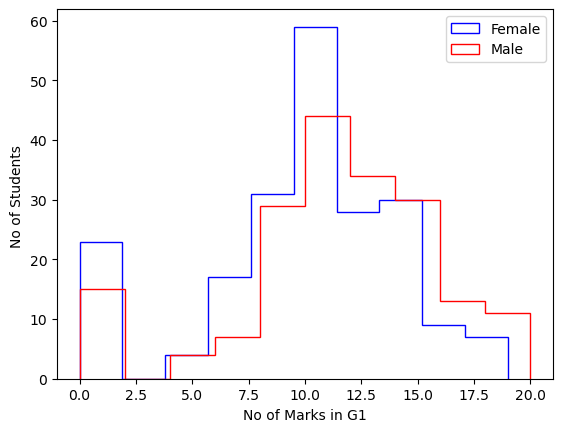

In [58]:
X=plt.hist(HistF, color = 'blue',histtype='step', label = 'Female')
Y=plt.hist(HistM, color = 'red',histtype='step', label = 'Male')
plt.xlabel('No of Marks in G1')
plt.ylabel('No of Students ')
plt.legend()
plt.show(X+Y)

In [53]:
df1=df[(df.sex=='F')]
HistF=df1[['G2']]
df2=df[(df.sex=='M')]
HistM=df2[['G2']]

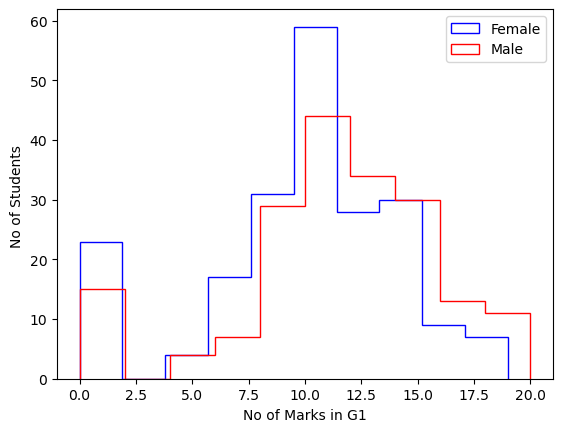

In [59]:
X=plt.hist(HistF, color = 'blue',histtype='step', label = 'Female')
Y=plt.hist(HistM, color = 'red',histtype='step', label = 'Male')
plt.xlabel('No of Marks in G1')
plt.ylabel('No of Students ')
plt.legend()
plt.show(X+Y)

In [55]:
df1=df[(df.sex=='F')]
HistF=df1[['G3']]
df2=df[(df.sex=='M')]
HistM=df2[['G3']]

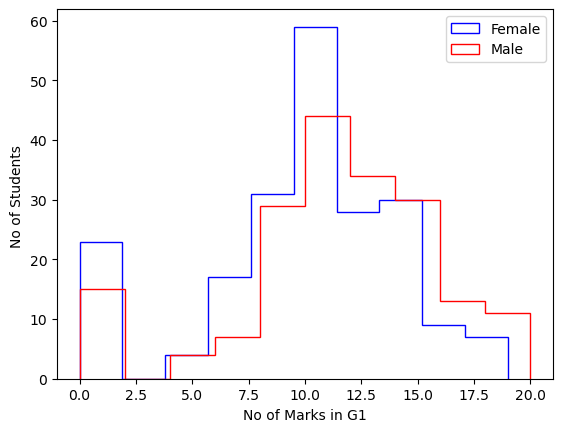

In [60]:
X=plt.hist(HistF, color = 'blue',histtype='step', label = 'Female')
Y=plt.hist(HistM, color = 'red',histtype='step', label = 'Male')
plt.xlabel('No of Marks in G1')
plt.ylabel('No of Students ')
plt.legend()
plt.show(X+Y)

<h2> $\mathcal{From\; the\; above\; histograms\; we\; can\; observe\; that\; boys\; tend\; to \;perform\; better \;than\; girls\; for\; the \;above\; dataset.}$

<h1>e. Scatter Plot trying to see the correlation between the days when a student takes leaves and their grades 

<h3> (Unfortunately for this dataset there seems to be very little data with large variety of numbers, therefore scatter is not the ideal choice for a graph) 

In [90]:
Gst1 = df[['G1','absences']]

In [91]:
Gst1

,G1,absences
0,5,6
1,5,4
2,7,10
3,15,2
4,6,4
...,...,...
390,9,11
391,14,3
392,10,3
393,11,0


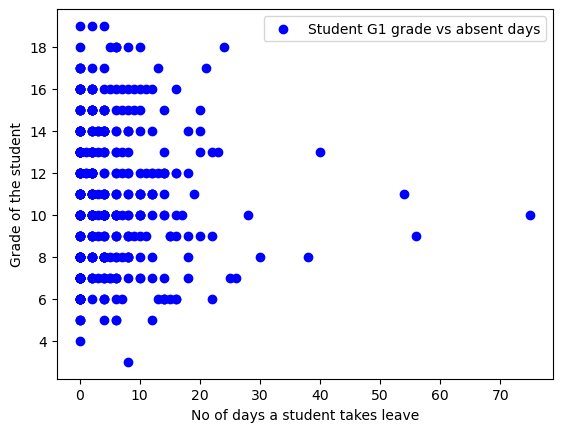

In [136]:
X1=plt.scatter(Gst1[['absences']], Gst1[['G1']], color='blue', label='Student G1 grade vs absent days')
plt.xlabel('No of days a student takes leave')
plt.ylabel('Grade of the student')
plt.legend()
plt.show(X1)

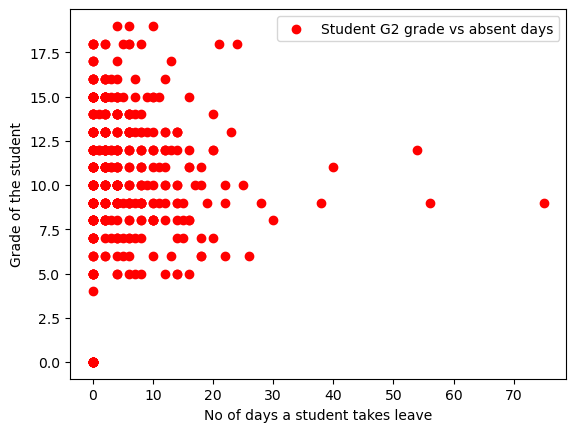

In [135]:
Gst2 = df[['G2','absences']]
X2=plt.scatter(Gst2[['absences']], Gst2[['G2']], color='red',label='Student G2 grade vs absent days')
plt.xlabel('No of days a student takes leave')
plt.ylabel('Grade of the student')
plt.legend()
plt.show(X2)

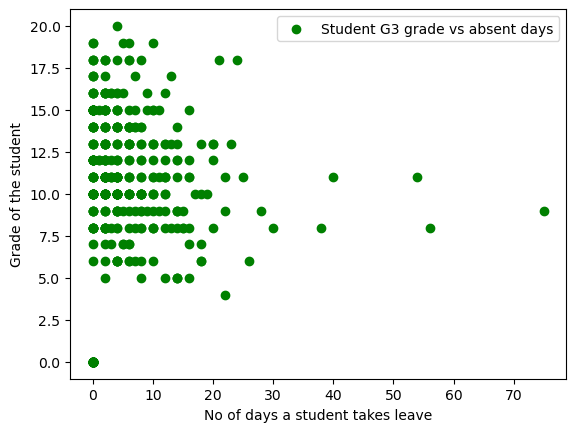

In [134]:
Gst3 = df[['G3','absences']]
X3=plt.scatter(Gst3[['absences']], Gst3[['G3']], color='green', label='Student G3 grade vs absent days')
plt.xlabel('No of days a student takes leave')
plt.ylabel('Grade of the student')
plt.legend()
plt.show(X3)

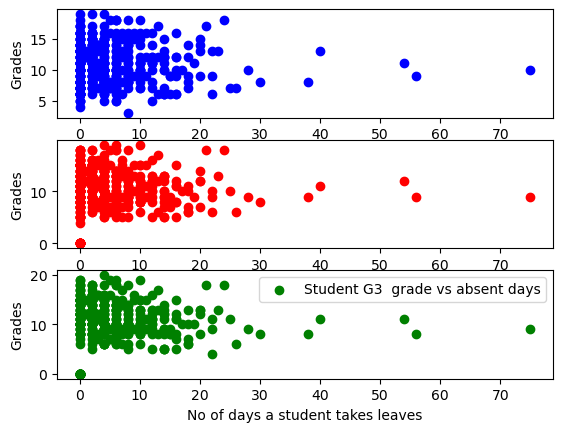

In [133]:
plt.subplot(3,1,1)
plt.scatter(Gst1[['absences']], Gst1[['G1']], color='blue', label='Student G1 grade vs absent days')
plt.xlabel('No of days a student takes leaves')
plt.ylabel('Grades')
plt.subplot(3,1,2)
plt.scatter(Gst2[['absences']], Gst2[['G2']], color='red', label='Student G2 grade vs absent days')
plt.xlabel('No of days a student takes leaves')
plt.ylabel('Grades')
plt.subplot(3,1,3)
plt.scatter(Gst3[['absences']], Gst3[['G3']], color='green', label='Student G3  grade vs absent days')
plt.xlabel('No of days a student takes leaves')
plt.ylabel('Grades')
plt.legend()
plt.show()

In [119]:
print (df['G1'].mean(), df['G2'].mean(), df['G3'].mean() )

10.90886075949367 10.713924050632912 10.415189873417722


<h2> $\mathcal{From\; the\; above\; scatter\; we\; can\; observe\; that\; attending \; the \; school \; regularly \; does \; not \; necessarily \; imply \; that \; one \; will \; attain \; better \; grades. \; Students \; with \; poor \; attendance \; get \; marks \; close \; to\; the \; class \; average. \; Most \; students \; who \; perform\; well \; attend \; the \; school \; rather\; regularly\; though.}$